---
<h1><center>  lab 6 : Text Feature Engineering </center>
    
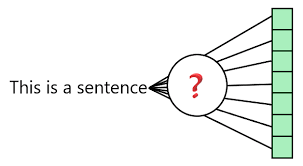


> `Created by: Jinnie Shin (jinnie.shin@ualberta.ca)`\
> `Date: `
---
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmNf86oJnfhpkPA9LnrFnAbfwF2VywPYpB_w&usqp=CAU" align="left" width="70" height="70" align="left"> 

 ### Required Packages or Dependencies

In [2]:
!pip install syllables #run this if you run into an error (download syllables)
import syllables 
import numpy as np
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



## **REVIEW**: Dataset

> Using the text_normalizer function we created last time, we will import `essay set 5`

#### Essay Set 8
`Prompt`: We all understand the benefits of laughter. For example, someone once said, "Laughter is the shortest distance between two people." Many other people believe that laughter is an important part of any relationship. Tell a true story in which laughter was one element or part. 


| Type of response            | Persuasive/Narrative/Expository |
|-----------------------------|---------------------------|
| Grade level                 | `10`                       |
| Total sample size           | `918`                |
| Average length of responses | `650 words`                  |
| Score range                 | `0-30`                       |

In [3]:
data = pd.read_excel('./data/training_set_rel3.xlsx')
data = data[data.essay_set==8]
print(data.iloc[1].essay)

FileNotFoundError: ignored


## 1. Extracting Descriptive Indices


In [5]:
def descriptives(text):
      ## the total number of sentences 
        
    import nbimporter
    from week3 import text_normalize
    normalizer = text_normalize()
    
    sentences = normalizer.sent_tokenize(text)
    n_sentences = len(sentences)
  
      ## the total number of words (tokens)
    words = normalizer.tokenize(text)
    n_words = len(words)
  
      ## the total number of unique vocabulary 
    unique_words = set(words)
    n_unique_words = len(unique_words)
  
      ## the total number of stop words 
    import nltk 
    stop_words = list(set(nltk.corpus.stopwords.words('english')))
    n_stopwords = len([i for i in words if i in stop_words])
  
      ## the total number of punctuation marks 
    n_punc = len([i for i in words if i in """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""])
  
      ## total number of syllables 
    n_syllables = np.sum([syllables.estimate(i) for i in words])
    
    ############################ MINI TASK ###################################

    #1. Total number of unique lemmas

    
    #2. Total number of unique stems
    

    
    ##########################################################################
    
    return n_sentences, n_words, n_unique_words, n_stopwords, n_punc, n_syllables #, n_lemmas, n_stems

> *Let's explore!*

In [6]:
text = data.iloc[0].essay

descriptives(text)

NameError: ignored

<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">

> ## Task 1: Descriptive Indices

> Q1. Let's apply the `descriptives` function to the entire dataframe (`data.essay`) and save them into a new column (`features`)

In [ ]:
################# YOUR CODE HERE ############
data['features'] = data.essay.apply(descriptives)
data.features
############################################

## 2. Readability Indices

In [ ]:
class readability(): 
  
    def __init__(self): 
        self.n_sent, self.n_word, self.n_unique, self.n_stop, self.n_punc, self.n_syll, _, _ = descriptives(text)

    def fr_score(self, text):
        score = 206.835-1.015*(self.n_word/self.n_sent) - 84.6*(self.n_syll/self.n_word)
        return score 
 
    def gf_score(self, text):
        score = 0.4*((self.n_word/self.n_sent)+ 100*(self.n_word))
        return score 
  
    def smog(self, text):
        if self.n_sent < 30:
            score = 1.0430*np.sqrt(self.n_syll*(30/self.n_sent))+3.1291
            return score
        else:
            return print('total number of sentences are less than 30')

In [ ]:
analyzer = readability()
print(analyzer.fr_score(text))
print(analyzer.gf_score(text))
print(analyzer.smog(text))

86.72442806694306
33408.5641025641
total number of sentences are less than 30
None


## 4. Computational Linguistic Features (Coh-Metrix)
> More information about Coh-metrix is available at: 

In [ ]:
def coh_metrix():
    features = pd.read_excel('features.xlsx')
    features = features[features.essay_set ==8]
 
    #descriptive indices 
    DI = features[['DESPC', 'DESSC', 'DESWC', 'DESPL', 'DESPLd', 'DESSL',
               'DESSLd', 'DESWLsy', 'DESWLsyd', 'DESWLlt', 'DESWLltd']]
    # various types of computational linguistic resources introduced as well :) 
    

,TextID,domain1_score,domain2_score,essay_id,essay_set,DESPC,DESSC,DESWC,DESPL,DESPLd,...,WRDCNCc,WRDIMGc,WRDMEAc,WRDPOLc,WRDHYPn,WRDHYPv,WRDHYPnv,RDFRE,RDFKGL,RDL2
12255,C:\Users\minerva\Dropbox (LAC)\Coh-Metrix Cons...,34.0,NaN,20716,8,1,38,707,38,0,...,377.657013,423.114990,442.428986,4.543,5.187,1.755,1.299,87.954002,5.614,29.268999
12256,C:\Users\minerva\Dropbox (LAC)\Coh-Metrix Cons...,46.0,NaN,20717,8,1,30,785,30,0,...,361.216003,401.337006,425.963989,5.203,6.755,1.574,1.435,74.441002,9.377,26.313000
12257,C:\Users\minerva\Dropbox (LAC)\Coh-Metrix Cons...,40.0,NaN,20718,8,1,39,861,39,0,...,362.916992,402.194000,439.717011,4.861,6.612,1.485,1.452,72.500999,8.631,25.375999
12258,C:\Users\minerva\Dropbox (LAC)\Coh-Metrix Cons...,30.0,NaN,20719,8,1,27,708,27,0,...,362.027008,399.296997,417.182007,4.867,6.189,1.668,1.439,78.023003,8.891,24.730000
